# 라이브러리 설정

In [1]:
## 사용할 패키지 불러오기

import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm

from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from unittest.mock import inplace
from IPython.display import set_matplotlib_formats
from yellowbrick.cluster import KElbowVisualizer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from random import randint
import datetime
import math
import time
import datetime
import warnings
import mariadb
import pymysql

warnings.simplefilter(action='ignore', category=FutureWarning)
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
warnings.filterwarnings(action='ignore')
#그래프에서 음수 값이 나올 때, 깨지는 현상 방지
mpl.rc('axes',unicode_minus=False)

# Korean Font Setting
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
# 라이브러리

def day_extract(Time):
    splited = Time.split(' ')
    return splited[0]


def to_dt(Time):
    return datetime.datetime.strptime(Time, '%Y-%m-%d %H')


def to_datetime(Time):
    return datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M')


def to_datetime_with_seconds(Time):
    return datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')

# 날씨 데이터 Load

In [3]:
''''''
# WF_df = pd.concat([WF_df, temp_df])
# WF_df#.to_csv('./wfdf.csv', encoding='cp949')
WF_df = pd.read_csv('wfdf.csv', encoding='cp949',index_col=0)
WF_df


,baseDT,fcstDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc
0,2022-04-05 23:00:00,2022-04-06 00:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동
1,2022-04-05 23:00:00,2022-04-06 01:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동
2,2022-04-05 23:00:00,2022-04-06 02:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동
3,2022-04-05 23:00:00,2022-04-06 03:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동
4,2022-04-05 23:00:00,2022-04-06 04:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2023-01-09 20:00:00,2023-01-12 20:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.7,117.0,0.9,0.0,2.0,남가좌제1동
149981,2023-01-09 20:00:00,2023-01-12 21:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.9,121.0,1.2,0.0,2.3,남가좌제1동
149982,2023-01-09 20:00:00,2023-01-12 22:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동
149983,2023-01-09 20:00:00,2023-01-12 23:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동


 + PCP 강우상태
<br><br>
 + POP 강수확률(%)
<br><br>
 + PTY 강수형태
    - 없음(0), 비(1), 비/눈(2), 눈(3)
<br><br>
 + REH 습도(%)
<br><br>
 + SKY 하늘상태
   - 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
<br><br>   
 + SNO 적설상태
<br><br>
 + TMN 일 최저기온(℃)
<br><br>
 + TMP 온도(℃)
<br><br>
 + TMX 일 최고기온(℃)
<br><br>
 + UUU 동서바람성분(m/s)
<br><br>
 + VEC 풍향(deg)
<br><br>
 + VVV 남북바람성분(m/s)
<br><br>
 + WAV 파고
<br><br>
 + WSD 풍속(m/s)

## 불쾌지수
+ DI =9/5Ta-0.55(1-RH)(9/5Ta-26)+32  
+ Ta : 건구온도 (℃)  
+ RH : 상대습도 (소수단위)  

In [4]:
WF_df['DI'] = (9/5*WF_df['TMP']) - (0.55*((100-WF_df['REH'])/100)*(9/5*WF_df['TMP']-26)) + 32
WF_df

,baseDT,fcstDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc,DI
0,2022-04-05 23:00:00,2022-04-06 00:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동,49.8170
1,2022-04-05 23:00:00,2022-04-06 01:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동,49.5475
2,2022-04-05 23:00:00,2022-04-06 02:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동,47.9950
3,2022-04-05 23:00:00,2022-04-06 03:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동,46.0740
4,2022-04-05 23:00:00,2022-04-06 04:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동,47.3570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2023-01-09 20:00:00,2023-01-12 20:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.7,117.0,0.9,0.0,2.0,남가좌제1동,49.5475
149981,2023-01-09 20:00:00,2023-01-12 21:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.9,121.0,1.2,0.0,2.3,남가좌제1동,49.5475
149982,2023-01-09 20:00:00,2023-01-12 22:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동,49.2780
149983,2023-01-09 20:00:00,2023-01-12 23:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동,49.2780


# 전력사용량 데이터 Load

In [5]:
usage_df = pd.read_csv('APT0000005.csv')

usage_df['index'] = pd.to_datetime(usage_df['index'])
usage_df.set_index('index',inplace=True)

usage_df

,101-1001,102-1201,101-1002,101-101,101-102,101-103,101-104,101-1101,101-1102,101-1201,...,110-402,110-501,109-403,109-803,110-602,110-701,110-702,110-801,109-804,109-404
index,,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:00:00,0.090,0.190,0.340,0.230,0.490,0.520,0.220,0.360,0.540,0.420,...,0.310,0.310,0.270,0.110,0.330,0.750,0.820,0.470,0.260,0.220
2021-09-01 01:00:00,0.090,0.120,0.240,0.280,0.460,0.390,0.240,0.380,0.500,0.320,...,0.230,0.260,0.280,0.110,0.300,0.610,0.400,0.540,0.200,0.250
2021-09-01 02:00:00,0.080,0.110,0.220,0.340,0.220,0.420,0.220,0.410,0.480,0.220,...,0.180,0.230,0.290,0.120,0.280,0.350,0.340,0.640,0.180,0.200
2021-09-01 03:00:00,0.000,0.120,0.230,0.280,0.180,0.380,0.230,0.330,0.430,0.250,...,0.170,0.260,0.290,0.130,0.330,0.360,0.330,0.640,0.200,0.300
2021-09-01 04:00:00,0.100,0.110,0.240,0.330,0.170,0.400,0.270,0.360,0.570,0.220,...,0.180,0.230,0.200,0.130,0.270,0.360,0.330,0.810,0.200,0.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.292,0.442,0.209,0.139,1.774,0.523,0.115,0.236,2.203,0.434,...,0.598,0.209,0.451,0.325,0.914,0.697,0.260,1.088,0.656,0.341
2022-12-31 20:00:00,0.392,0.518,0.151,0.137,0.539,0.456,0.107,0.205,1.368,1.048,...,0.923,0.239,0.521,0.276,0.804,0.584,0.275,1.009,0.883,0.337
2022-12-31 21:00:00,0.335,0.740,0.282,0.128,0.593,0.443,0.179,0.197,0.748,0.870,...,0.587,0.269,0.340,0.322,0.882,0.559,0.278,0.910,0.713,0.337


 + https://github.com/krishnavamshi3/Driving-range-Prediction-and-Energy-Consumption-in-EV-s

# Data Cleansing

In [6]:
WF_df['fcstDT'] = pd.to_datetime(WF_df['fcstDT'])
WF_df.set_index('fcstDT',inplace=True)
WF_df.head()

,baseDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc,DI
fcstDT,,,,,,,,,,,,,,,,,
2022-04-06 00:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동,49.8170
2022-04-06 01:00:00,2022-04-05 23:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동,49.5475
2022-04-06 02:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동,47.9950
2022-04-06 03:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동,46.0740
2022-04-06 04:00:00,2022-04-05 23:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동,47.3570


In [7]:
WF_df['TMP'][(WF_df.index >= '2022-09-20 00:00:00') & (WF_df.index <= '2022-09-25 00:00:00') & (WF_df['TMP'] <= 0.5)] = np.nan

idx = WF_df['TMP'].isna()
WF_df[idx]['TMP']

WF_df['TMP'] = WF_df['TMP'].interpolate(method='linear')

WF_df.head()

,baseDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc,DI
fcstDT,,,,,,,,,,,,,,,,,
2022-04-06 00:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동,49.8170
2022-04-06 01:00:00,2022-04-05 23:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동,49.5475
2022-04-06 02:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동,47.9950
2022-04-06 03:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동,46.0740
2022-04-06 04:00:00,2022-04-05 23:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동,47.3570


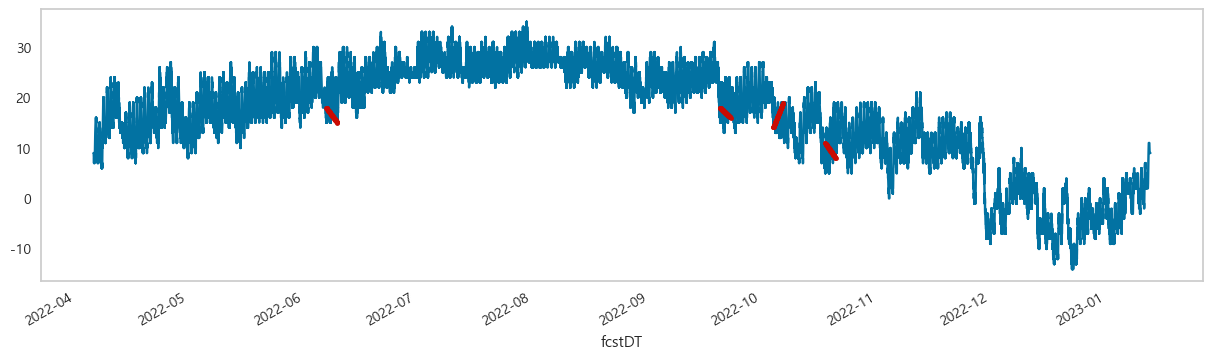

In [8]:
# Visualization
plt.figure(figsize=(15,4))
WF_df['TMP'].plot()
WF_df[idx]['TMP'].plot(style='r.')
plt.grid()

<AxesSubplot:title={'center':'상관관계 heatmap'}>

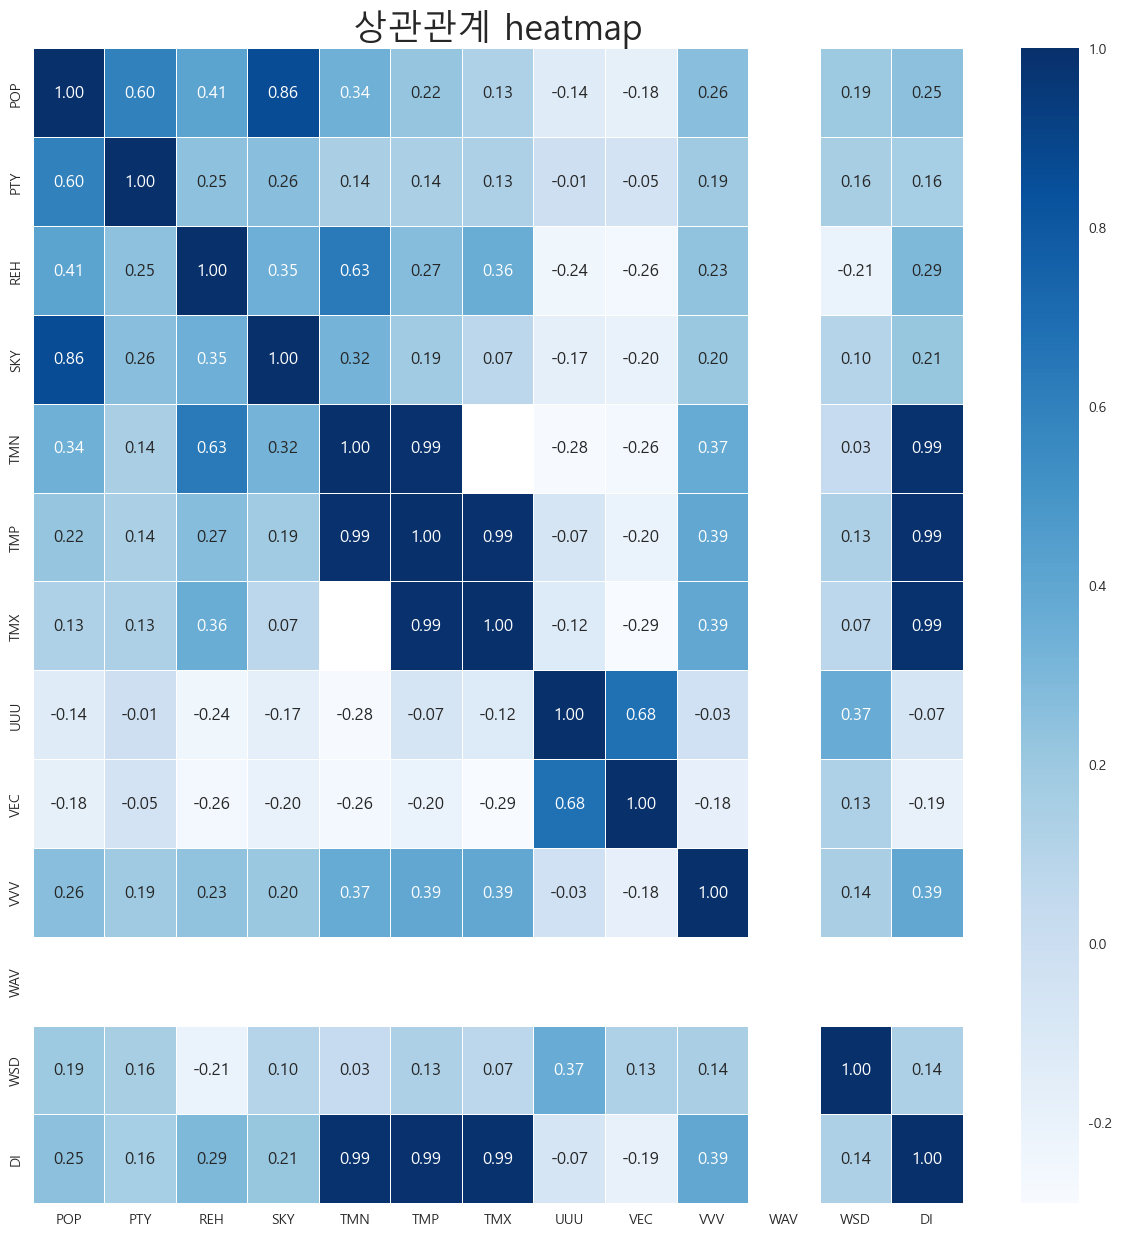

In [9]:
plt.figure(figsize=(15,15))
plt.title("상관관계 heatmap", fontsize=25)
sns.heatmap(data = WF_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Data Formatting

In [10]:
out_door_use = False

first_dt = WF_df.index[0]
mean_WF_df = WF_df.groupby(level=0).mean()
# out door data 사용 시, 전처리
if out_door_use:
    out_tt_df = pd.read_csv('outdoor_table_tranpose.csv', index_col='index') # data read
    out_tt_df.index = pd.to_datetime(out_tt_df.index) # index datetime 형태로 변경
    out_tt_df = out_tt_df * 1 # Boolean to int
    last_dt = out_tt_df.index[-1] # out_tt_df date 기준으로 맞추기 위함. UGDF 기준 시 out door data와 기간이 달라져 row 개수가 다름
    out_tt_df = out_tt_df[(out_tt_df.index >= first_dt) & (out_tt_df.index <= last_dt)] # out door data 해당 기간으로 indexing
    UG_df = usage_df[(usage_df.index >= first_dt) & (usage_df.index <= last_dt)] # usage df 해당 기간으로 indexing
    UG_df = UG_df[out_tt_df.columns] # out door df 의  동-호수와 맞추기 위함. outdoor df 와 usage df 동-호수 정보 다르므로, 맞춘다.
else: # out door data 사용 안할 시, out_tt_df None 으로 출력
    last_dt = usage_df.index[-1]
    UG_df = usage_df[(usage_df.index >= first_dt) & (usage_df.index <= last_dt)]
    out_tt_df = None

In [11]:
UG_df

,101-1001,102-1201,101-1002,101-101,101-102,101-103,101-104,101-1101,101-1102,101-1201,...,110-402,110-501,109-403,109-803,110-602,110-701,110-702,110-801,109-804,109-404
index,,,,,,,,,,,,,,,,,,,,,
2022-04-06 00:00:00,0.059,0.130,0.318,0.206,0.590,0.370,0.536,0.359,0.530,0.316,...,0.218,0.371,0.238,0.189,0.316,0.517,0.721,0.581,0.262,0.243
2022-04-06 01:00:00,0.060,0.100,0.373,0.221,0.554,0.356,0.517,0.729,0.799,0.353,...,0.195,0.260,0.187,0.188,0.237,0.339,0.507,0.538,0.171,0.252
2022-04-06 02:00:00,0.058,0.103,0.266,0.220,0.333,0.311,0.481,0.473,0.507,0.305,...,0.187,0.240,0.202,0.177,0.235,0.285,0.470,0.413,0.156,0.246
2022-04-06 03:00:00,0.054,0.101,0.218,0.179,0.172,0.478,0.480,0.433,0.417,0.259,...,0.181,0.253,0.190,0.210,0.301,0.322,0.457,0.480,0.155,0.269
2022-04-06 04:00:00,0.054,0.098,0.228,0.161,0.181,0.385,0.406,0.428,0.428,0.267,...,0.180,0.245,0.136,0.185,0.325,0.332,0.500,0.498,0.155,0.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.292,0.442,0.209,0.139,1.774,0.523,0.115,0.236,2.203,0.434,...,0.598,0.209,0.451,0.325,0.914,0.697,0.260,1.088,0.656,0.341
2022-12-31 20:00:00,0.392,0.518,0.151,0.137,0.539,0.456,0.107,0.205,1.368,1.048,...,0.923,0.239,0.521,0.276,0.804,0.584,0.275,1.009,0.883,0.337
2022-12-31 21:00:00,0.335,0.740,0.282,0.128,0.593,0.443,0.179,0.197,0.748,0.870,...,0.587,0.269,0.340,0.322,0.882,0.559,0.278,0.910,0.713,0.337


In [12]:

for i in range(len(UG_df.columns)):
    
    # Building DataFrame for forecasting
    # out door table을 사용하면 out tt df 가 None이 아니고, 사용하지 않으면, None이 된다. 이에 따라 column 의 형태를 정해준다.
    columns = ['weekday', 'MONTH', 'DAY', 'HOUR', 'TEM', 'DI', 'WSD','outdoor', str(UG_df.columns[i])] if out_tt_df is not None else['weekday', 'MONTH', 'DAY', 'HOUR', 'TEM', 'DI', 'WSD', str(UG_df.columns[i])]
    globals()['df_' + str(i)] = pd.DataFrame(UG_df.iloc[:, i])
    globals()['df_' + str(i)]['weekday'] = globals()['df_' + str(i)].index.weekday
    globals()['df_' + str(i)]['MONTH']   = globals()['df_' + str(i)].index.month
    globals()['df_' + str(i)]['DAY']     = globals()['df_' + str(i)].index.day
    globals()['df_' + str(i)]['HOUR']    = globals()['df_' + str(i)].index.hour
    globals()['df_' + str(i)]['TEM']     = mean_WF_df['TMP']
    globals()['df_' + str(i)]['DI']      = mean_WF_df['DI']
    globals()['df_' + str(i)]['WSD']     = mean_WF_df['WSD']

    # out door table 사용 여부에 따라 outdoor column을 추가 하거나 하지 않거나를 결정한다.
    if out_tt_df is not None: globals()['df_'+str(i)]['outdoor'] = out_tt_df.iloc[:, i].values
    
    globals()['df_' + str(i)]            = globals()['df_' + str(i)][columns]
    globals()['df_train'+str(i)]         = globals()['df_'+str(i)].loc['2022-04-06 00:00:00' : '2022-10-31 23:00:00']
    globals()['df_test'+str(i)]          = globals()['df_'+str(i)].loc['2022-11-01 00:00:00' : '2022-12-26 23:00:00']
    
    globals()['df_train_status'+str(i)]  = globals()['df_train'+str(i)].describe().transpose()
    
    # Normalization
    def norm(x):
        return (x - globals()['df_train_status'+str(i)]['mean']) / globals()['df_train_status'+str(i)]['std']

    # Normalization for training
    globals()['norm_df_train'+str(i)] = norm(globals()['df_train'+str(i)])

    # Normalization for testing
    globals()['norm_df_test'+str(i)]  = norm(globals()['df_test'+str(i)])


In [13]:
# cnn function 생성
def cnn_1d(input_size,):

    model = tf.keras.Sequential()

    # VGGNet Style
    model.add(tf.keras.layers.Conv1D(32, 3, strides=1, activation='relu', padding='same', input_shape = input_size))
    model.add(tf.keras.layers.Conv1D(32, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(32, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(3))

    model.add(tf.keras.layers.Conv1D(64, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(64, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(64, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(3))

    model.add(tf.keras.layers.Conv1D(128, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    return model

# xgb function 생성
def xgb(params=None):
        
    xgb_model = XGBRegressor(**params) if params is not None else XGBRegressor() # parameter 수정 된 파라미터가 있을 시 해당 parameter 적용, 아니면 그냥 기본 모델 적용

    return xgb_model

def lstm_model(input_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(10, activation='relu', input_shape=input_size, return_sequences=True))# return sequence true를 통해 다음 layer에 전달할 hiddenlayer를 return 해준다.
    model.add(tf.keras.layers.LSTM(5, return_sequences=False)) # 마지막 시점의 sequence만 return 함
    model.add(tf.keras.layers.Flatten()) # fc layer에 넣기 위한 flatten 과정
    model.add(tf.keras.layers.Dense(5)) # fc layer node 5개 
    model.add(tf.keras.layers.Dense(1)) # 출력 layer
    return model


def cnn_lstm(input_data):
    model_cnn_lstm = tf.keras.Sequential()
    # 시계열 data를 활용한 cnn-lstm을 modeling 하려면, 각Step의 오류가 역전파되어 weight가 update되어야하므로, Time Distrubuted 함수를 활용하여 각 sequence에 전파되도록한다.
    model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'), 
                                                                              input_shape=(None, input_data.shape[2], input_data.shape[3])))
    model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(pool_size=2)))
    model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
    model_cnn_lstm.add(tf.keras.layers.LSTM(50, activation='relu'))
    model_cnn_lstm.add(tf.keras.layers.Dense(1))
    return model_cnn_lstm
    


In [14]:

from sklearn.multioutput import MultiOutputRegressor

def denorm(y,df_std, df_mean):
    return y * df_std + df_mean

def run_cnn(data_dict):
    '''
        cnn Model 을 run 하기 위한 함수,
        Input 은 data_dict 로 train, test, std, mean, EPOCHS 등 의 정보를 담고 있다.

        Output 은 pandas series 형식 으로 cnn mse와, numpy array 형식으로 학습된 Model의 test data 예측 값이 출력됨.
    '''
    result_df = pd.DataFrame()

    EPOCHS = data_dict['EPOCHS']
    train_x, train_y, test_x, test_y = data_dict['train_x1'],data_dict['train_y1'], data_dict['test_x1'],data_dict['test_y1']

    model = cnn_1d(train_x.shape[1:])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error', 'mean_squared_error'])

    # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(train_x, train_y, epochs=EPOCHS, validation_split = 0.2, callbacks=[early_stop])

    normed_test_predictions = model.predict(test_x).flatten()
    testY_predictions = denorm(normed_test_predictions, df_std=data_dict['std'], df_mean=data_dict['mean'])

    print('cnn mse : ', np.mean(np.square(normed_test_predictions-test_y)))
    print('cnn r2 : ', r2_score(test_y,normed_test_predictions))

    result_df['cnn_mse'] = pd.Series(np.mean(np.square(normed_test_predictions-test_y)))
    result_df['cnn_r2'] = pd.Series(r2_score(test_y,normed_test_predictions))

    return result_df, testY_predictions

def run_xgb(data_dict):
    '''
        Xgboost regressor Model 을 run 하기 위한 함수,
        Input 은 data_dict 로 train, test, std, mean, EPOCHS 등 의 정보를 담고 있다.

        Output 은 pandas series 형식 으로 xgb mse와, numpy array 형식으로 학습된 Model의 test data 예측 값이 출력됨.

        GridCV로 파라미터 최적화 과정이 코드 내 구성 되어 있지만, 시간이 너무 오래걸려서 일단 막아 두었음.
    '''
    result_df = pd.DataFrame()

    train_x, train_y, test_x, test_y = data_dict['train_x2'],data_dict['train_y2'], data_dict['test_x2'],data_dict['test_y2']
    # xgb_params = {
    #       'max_depth': [2, 4, 6],
    #       'n_estimators': [100, 500, 1000],
    #       'colsample_bytree': [0.2, 0.6, 0.8],
    #       'min_child_weight': [3, 5, 7],
    #       'gamma': [0.3, 0.5, 0.7],
    #       'subsample': [0.4, 0.6, 0.8]
    #       }
    # gridcv = GridSearchCV(xgb(), param_grid=xgb_params, cv=5)
    #
    # gridcv.fit(train_x, train_y)
    # print(gridcv.best_params_)

    set_params = {'colsample_bytree': 0.2,
                  'gamma': 0.3,
                  'max_depth': 2,
                  'min_child_weight': 3,
                  'n_estimators': 100,
                  'subsample': 0.4}
    model_xgb = MultiOutputRegressor(xgb(set_params)).fit(train_x, train_y)

    # model_xgb = MultiOutputRegressor(xgb(gridcv.best_params_)).fit(train_x, train_y)

    # test data 예측 및 mse loss 계산
    normed_test_predictions = model_xgb.predict(test_x)

    print('xgb mse : ', np.mean(np.square(normed_test_predictions-test_y.reshape(-1,1))))
    print('xgb r2 : ', r2_score(test_y.reshape(-1,1), normed_test_predictions))
    testY_predictions = denorm(normed_test_predictions, df_std=data_dict['std'], df_mean=data_dict['mean'])
    #결과 data frame에 해당 loss 값 할당
    result_df['xgboost_mse'] = pd.Series(np.mean(np.square(normed_test_predictions-test_y.reshape(-1,1))))
    result_df['xgboost_r2'] = pd.Series(r2_score(test_y.reshape(-1,1), normed_test_predictions))

    return result_df, testY_predictions.reshape(-1)



def run_lstm(data_dict):
    '''
        LSTM Model 을 run 하기 위한 함수,
        Input 은 data_dict 로 train, test, std, mean, EPOCHS 등 의 정보를 담고 있다.

        Output 은 pandas series 형식 으로 lstm mse와, numpy array 형식으로 학습된 Model의 test data 예측 값이 출력됨.
    '''
    result_df = pd.DataFrame()
    EPOCHS = data_dict['EPOCHS']
    train_x, train_y, test_x, test_y = data_dict['train_x1'],data_dict['train_y1'], data_dict['test_x1'],data_dict['test_y1']
    lstm_rgr = lstm_model(train_x.shape[1:])
    lstm_rgr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mean_squared_error',
                metrics=['mean_absolute_error', 'mean_squared_error'])
    # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # lstm 학습
    history = lstm_rgr.fit(train_x, train_y, epochs=EPOCHS, validation_split = 0.2, callbacks=[early_stop])
    normed_test_predictions = lstm_rgr.predict(test_x).flatten()

    print('lstm mse : ', np.mean(np.square(normed_test_predictions-test_y)))
    print('lstm r2 : ', r2_score(test_y, normed_test_predictions))
    testY_predictions = denorm(normed_test_predictions, df_std=data_dict['std'], df_mean=data_dict['mean'])


    result_df['lstm_mse'] = pd.Series(np.mean(np.square(normed_test_predictions-test_y)))
    result_df['lstm_r2'] = pd.Series(r2_score(test_y, normed_test_predictions))

    return result_df,testY_predictions

def run_cnn_lstm(data_dict):
    '''
        CNN-LSTM Model 을 run 하기 위한 함수,
        Input 은 data_dict 로 train, test, std, mean, EPOCHS 등 의 정보를 담고 있다.

        Output 은 pandas series 형식 으로 cnn-lstm mse와, numpy array 형식으로 학습된 Model의 test data 예측 값이 출력됨.
    '''
    result_df = pd.DataFrame()

    EPOCHS = data_dict['EPOCHS']
    subsequences = 8
    train_x, train_y, test_x, test_y = data_dict['train_x2'],data_dict['train_y2'], data_dict['test_x2'],data_dict['test_y2']
    timesteps = train_x.shape[1]//subsequences
    X_train_series_sub = train_x.reshape((train_x.shape[0], subsequences, timesteps, 1))
    X_test_series_sub = test_x.reshape((test_x.shape[0], subsequences, timesteps, 1))

    cnn_lstm_rgr = cnn_lstm(X_train_series_sub)
    cnn_lstm_rgr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error', 'mean_squared_error'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    history = cnn_lstm_rgr.fit(X_train_series_sub, train_y, epochs=EPOCHS, validation_split = 0.2, callbacks=[early_stop])
    normed_test_predictions = cnn_lstm_rgr.predict(X_test_series_sub).flatten()

    testY_predictions = denorm(normed_test_predictions, df_std=data_dict['std'], df_mean=data_dict['mean'])


    print('cnn_lstm mse : ', np.mean(np.square(normed_test_predictions-test_y)))
    print('cnn_lstm r2 : ', r2_score(test_y, normed_test_predictions))
    result_df['cnn_lstm_mse'] = pd.Series(np.mean(np.square(normed_test_predictions-test_y)))
    result_df['cnn_lstm_r2'] = pd.Series(r2_score(test_y, normed_test_predictions))
    return result_df, testY_predictions

In [15]:
# Traing/testing input/outout dataset
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - (seq_length)):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, -1]
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)


## 시계열 data machine learing model input 생성을 위한 함수
# window size 는 총 학습할 기간에 해당하며, step size는 다음 sequence의 시작 step을 의미한다.
# 즉 window size 가 10 이라면 10일 치의 과거 데이터가 indexing 되며(0~9), step size가 1 이라면, (1~10), (2~11) 이런식으로 시작 step이 설정된다.

def get_indices_entire_sequence(
        data: pd.DataFrame,
        window_size: int,
        step_size: int
) -> list:
    """
    Produce all the start and end index positions that is needed to produce
    the sub-sequences.
    Returns a list of tuples. Each tuple is (start_idx, end_idx) of a sub-
    sequence. These tuples should be used to slice the dataset into sub-
    sequences. These sub-sequences should then be passed into a function
    that slices them into input and target sequences.

    Args:
        data (pd.DataFrame): Partitioned data set, e.g. training data

        window_size (int): The desired length of each sub-sequence. Should be
                           (input_sequence_length + target_sequence_length)
                           E.g. if you want the model to consider the past 100
                           time steps in order to predict the future 50
                           time steps, window_size = 100+50 = 150
        step_size (int): Size of each step as the data sequence is traversed
                         by the moving window.
                         If 1, the first sub-sequence will be [0:window_size],
                         and the next will be [1:window_size].
    Return:
        indices: a list of tuples
    """

    stop_position = len(data) - 1  # 1- because of 0 indexing

    # Start the first sub-sequence at index position 0
    subseq_first_idx = 0

    subseq_last_idx = window_size

    indices = []

    while subseq_last_idx <= stop_position:
        indices.append((subseq_first_idx, subseq_last_idx))

        subseq_first_idx += step_size

        subseq_last_idx += step_size

    return indices


## 위 함수에서 생성된 index에 따라 데이터를 추출하는 함수
# data 는 위에서 전처리된 numpy 형태의 data input이며,
# target_seqeunce_length 는 예측할 수치의 수이다. ex) 1 일 경우 1일치에 대한 예측, 10 일 경우 10일치에 대한 예측
# input_seq_len 은 학습 데이터의 기간이다. 이는 위에서 설정한 window size와 동일해야한다.

def get_xgboost_x_y(
        indices: list,
        data: np.array,
        target_sequence_length,
        input_seq_len: int
):
    """
    Args:
        indices: List of index positions at which data should be sliced
        data: A univariate time series
        target_sequence_length: The forecasting horizon, m
        input_seq_len: The length of the model input, n
    Output:
        all_x: np.array of shape (number of instances, input seq len)
        all_y: np.array of shape (number of instances, target seq len)
    """
    print("Preparing data..")

    # Loop over list of training indices
    for i, idx in enumerate(indices):
        # Slice data into instance of length input length + target length
        x = data[idx[0]:idx[1], :]

        assert len(x) == input_seq_len

        y = data[idx[1] + target_sequence_length - 1, -1]

        # Create all_y and all_x objects in first loop iteration
        if i == 0:
            all_y = y.reshape(1, -1)
            all_x = x.reshape(1, -1)
        else:
            all_y = np.concatenate((all_y, y.reshape(1, -1)), axis=0)
            all_x = np.concatenate((all_x, x.reshape(1, -1)), axis=0)

    print("Finished preparing data!")
    return all_x, all_y

In [35]:
model_list = ['cnn', 'xgb', 'lstm', 'cnn_lstm']
seq_length = 24
EPOCHS = 1
cv_use = True
n_folds=2



def run_models(m_n, data_input):
    # 각 model에 따라 run 함수를 call 하는 dictionary
    model_dict = {'cnn': run_cnn,
                  'xgb': run_xgb,
                  'lstm': run_lstm,
                  'cnn_lstm': run_cnn_lstm}
    # parallel input parsing, 첫 번째 항목이 model 이름, 두 번째 항목이 data input dictionary
    model_name, data_input = m_n, data_input

    # model 이름에 맞춰 run 함수 coll 후 data input 넣어준다.
    output = model_dict[model_name](data_dict=data_input)
    
    return output


def run_cv(n_fold,data_dict):
    cv_data_dict = {}
    X1, Y1 = data_dict['train_x1'], data_dict['train_y1']
    X2, Y2 = data_dict['train_x2'], data_dict['train_y2']
    cv_mse = []
    cv_r2 = []
    for i in range(n_fold):
        print("Training on Fold: ",i+1)
        t_x1, val_x1, t_y1, val_y1 = train_test_split(X1, Y1, test_size=0.1, random_state = np.random.randint(1,1000, 1)[0])
        t_x2, val_x2, t_y2, val_y2 = train_test_split(X2, Y2, test_size=0.1, random_state = np.random.randint(1,1000, 1)[0])
        cv_data_dict['train_x1'], cv_data_dict['train_y1'] = t_x1, t_y1 # train data type 1 for cnn, lstm
        cv_data_dict['test_x1'],cv_data_dict['test_y1'] = val_x1, val_y1 # test data type 1 for cnn, lstm
        cv_data_dict['train_x2'],cv_data_dict['train_y2'] = t_x2, t_y2 # train data type 2 for xgb, cnn-lstm
        cv_data_dict['test_x2'],cv_data_dict['test_y2'] = val_x2, val_y2 # test data type 2 for xgb, cnn-lstm
        output = [run_models(m_n, data_dict) for m_n in model_list]
        tmp = pd.DataFrame()
        for o,rse in output: # output 구조 -> ( mse : pd.Series, pred_array : np.array)
            tmp = pd.concat([tmp, o], axis=1)
        out_df = tmp if i==0 else pd.concat([out_df, tmp],axis=0)
    cv_df = pd.DataFrame(out_df.mean(axis=0)).T
    cv_df.columns = [f'cv_{c}' for c in cv_df.columns]
    return cv_df

In [46]:
import csv, os
data_dict = {}
result_dict = {}
save_data = True

def array_to_txt(data_in, file_name):
    if os.path.exists(f'{file_name}.txt'): 
        os.remove(f'{file_name}.txt')
        with open(f'{file_name}.txt', "w") as file:
             for k, v in data_in.items():
                file.write(k)
                file.write('\n')
                for k2, v2 in v.items():
                    file.write(k2+'\n')
                    v2 = v2.reshape(1,-1)
                    np.savetxt(file,v2,delimiter=",")


for i in range(len(UG_df.columns)):
    normed_train_data = globals()['norm_df_train'+str(i)].values
    normed_test_data = globals()['norm_df_test'+str(i)].values

    normed_trainX, normed_trainY  = build_dataset(normed_train_data, seq_length)
    normed_testX, normed_testY = build_dataset(normed_test_data, seq_length)

    indices_tr = get_indices_entire_sequence(data=globals()['norm_df_train'+str(i)], window_size=seq_length, step_size=1) # data에 따른 train index 생성
    indices_te = get_indices_entire_sequence(data=globals()['norm_df_test'+str(i)], window_size=seq_length, step_size=1) # data에 따른 test index 생성

    xg_train_x, xg_train_y= get_xgboost_x_y(indices=indices_tr, data=normed_train_data, target_sequence_length=1, input_seq_len=seq_length) # index에 따른 train data 생성
    xg_test_x, xg_test_y= get_xgboost_x_y(indices=indices_te, data=normed_test_data, target_sequence_length=1, input_seq_len=seq_length) # index에 따른 test data 생성

    # 사용할 data 및 필요한 값을 dictionary 에 저장함.
    data_dict['train_x1'], data_dict['train_y1'] = normed_trainX, normed_trainY # train data type 1 for cnn, lstm
    data_dict['test_x1'],data_dict['test_y1'] = normed_testX, normed_testY # test data type 1 for cnn, lstm
    data_dict['train_x2'],data_dict['train_y2'] = xg_train_x, xg_train_y # train data type 2 for xgb, cnn-lstm
    data_dict['test_x2'],data_dict['test_y2'] = xg_test_x, xg_test_y # test data type 2 for xgb, cnn-lstm
    data_dict['std'], data_dict['mean'] = globals()['df_train_status'+str(i)]['std'][-1], globals()['df_train_status'+str(i)]['mean'][-1] # denorm 을 위한 train std, mean
    data_dict['EPOCHS'] = EPOCHS # cnn, lstm, cnn-lstm 의 epoch 설정을 위함.

    cv_result = run_cv(n_fold=n_folds, data_dict=data_dict) if cv_use else None

    output = [run_models(m_n, data_dict) for m_n in model_list] # 설정한 모델에 순차적으로 data가 들어가고, model 4개가 loop로 처리됨
    result_dict[list(UG_df.columns)[i]] = {} # 예측 결과를 담기 위한 dict 에 각 열 별 dict를 내부적으로 생성해서 각 동-호의 모델별 예측 값을 담기위함.
    tmp = pd.DataFrame() # 모델 별 mse를 data frame 형식으로 출력하기 위함.
    for o,rse in output: # output 구조 -> ( mse : pd.Series, pred_array : np.array)
        tmp = pd.concat([tmp, o], axis=1)
        result_dict[list(UG_df.columns)[i]][o.columns[0][:-4]] = rse
    out_df = tmp if i==0 else pd.concat([out_df, tmp],axis=0)
    if cv_result is not None:
        out_df = pd.concat([cv_result, out_df],axis=1)

    if save_data:
        array_to_txt(data_in=result_dict, file_name=list(UG_df.columns)[i])
            
    print(out_df)
    print(result_dict)
out_df = out_df.reset_index(drop=True)

# print(out_df)
# print(result_dict)

Preparing data..
Finished preparing data!
Preparing data..
Finished preparing data!
Training on Fold:  1
42/42 [==============================] - 2s 32ms/step
cnn mse :  0.4348799236685133
cnn r2 :  0.6486002435331126
xgb mse :  0.4494318466145508
xgb r2 :  0.6368417283636234
42/42 [==============================] - 1s 6ms/step
lstm mse :  1.295691275253975
lstm r2 :  -0.04696853959065206
42/42 [==============================] - 1s 25ms/step
cnn_lstm mse :  1.7581955418257478
cnn_lstm r2 :  0.4303436515597555
Training on Fold:  2
42/42 [==============================] - 1s 31ms/step
cnn mse :  0.4588070558051032
cnn r2 :  0.6292661976318406
xgb mse :  0.4494318466145508
xgb r2 :  0.6368417283636234
42/42 [==============================] - 1s 6ms/step
lstm mse :  1.09399235512819
lstm r2 :  0.11601196963575444
42/42 [==============================] - 1s 29ms/step
cnn_lstm mse :  1.5657481319562674
cnn_lstm r2 :  0.48897613293255415
42/42 [==============================] - 2s 33ms/step
c

KeyboardInterrupt: 